In [3]:
from keras.datasets import mnist
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


In [4]:
(x_Train, y_Train),(x_Test,y_Test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [0]:
x_Train4D=x_Train.reshape(x_Train.shape[0],28,28,1).astype('float32')
x_Test4D=x_Test.reshape(x_Test.shape[0],28,28,1).astype('float32')

In [0]:
x_Train4D_normalzie = x_Train4D /255
x_Test4D_normalzie = x_Test4D /255
y_Train_OneHot = np_utils.to_categorical(y_Train)
y_Test_OneHot = np_utils.to_categorical(y_Test)


In [0]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D

In [8]:
model = Sequential()
model.add(Conv2D(filters=16,kernel_size=(5,5),padding='same',input_shape=(28,28,1),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=36,kernel_size=(5,5),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [9]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 36)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1764)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)              

In [10]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
train_history = model.fit(x=x_Train4D_normalzie,y=y_Train_OneHot,validation_split=0.2,epochs=10,batch_size=300,verbose=2)



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 48000 samples, validate on 12000 samples
Epoch 1/10





 - 15s - loss: 0.4900 - acc: 0.8468 - val_loss: 0.0974 - val_acc: 0.9718
Epoch 2/10
 - 1s - loss: 0.1418 - acc: 0.9581 - val_loss: 0.0639 - val_acc: 0.9807
Epoch 3/10
 - 1s - loss: 0.1034 - acc: 0.9689 - val_loss: 0.0518 - val_acc: 0.9842
Epoch 4/10
 - 1s - loss: 0.0851 - acc: 0.9750 - val_loss: 0.0459 - val_acc: 0.9856
Epoch 5/10
 - 1s - loss: 0.0724 - acc: 0.9778 - val_loss: 0.0398 - val_acc: 0.9878
Epoch 6/10
 - 1s - loss: 0.0649 - acc: 0.9804 - val_loss: 0.0392 - val_acc: 0.9883
Epoch 7/10
 - 1s - loss: 0.0572 - acc: 0.9824 - val_loss: 0.0413 - val_acc: 0.9878
Epoch 8/10
 - 1s - loss: 0.0513 - acc: 0.9844 - val_loss: 0.0339 - val_acc: 0.9898
Epoch 9/10
 - 1s - loss: 0.0458 - acc: 0.9861 - val_loss: 0.0338 - val_acc: 0.9900
Epoch 10/10
 - 1s - loss: 0.0425 - acc: 0.9867 - val_loss: 0.0339 - val_acc: 0.9906


In [0]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
  plt.plot(train_history.history[train])
  plt.plot(train_history.history[validation])
  plt.title('Train History')
  plt.ylabel(train)
  plt.xlabel('Epoch')
  plt.legend(['train','validation'],loc='upper left')
  plt.show()

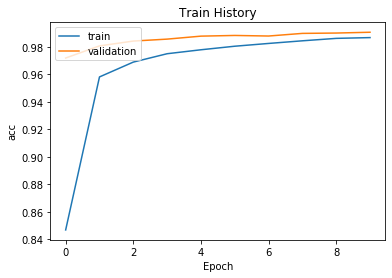

In [17]:
show_train_history(train_history,'acc','val_acc')

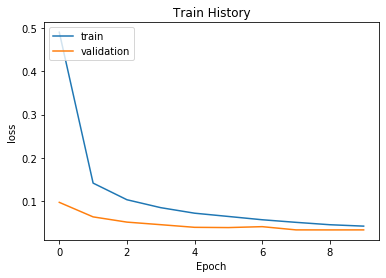

In [18]:
show_train_history(train_history,'loss','val_loss')

In [19]:
scores = model.evaluate(x_Test4D_normalzie, y_Test_OneHot)
scores[1]

10000/10000 [==============================] - 1s 65us/step


0.9904

In [0]:
prediction = model.predict_classes(x_Test4D_normalzie)

In [21]:
prediction[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

In [0]:
def plot_images_labels_prediction(images,labels,prediction,idx,num=10):
  flg = plt.gcf()
  flg.set_size_inches(12,14)
  if num>25: num=25
  for i in range(0, num):
    ax=plt.subplot(5,5,i+1)
    ax.imshow(images[idx],cmap='binary')
    title="label="+str(labels[idx])
    if len(prediction)>0:
      title+=",predition="+str(prediction[idx])
    ax.set_title(title, fontsize = 10)
    ax.set_xticks([]);ax.set_yticks([])
    idx+=1
  plt.show()

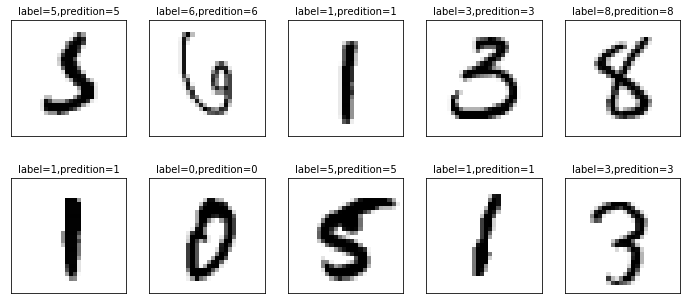

In [24]:
plot_images_labels_prediction(x_Test,y_Test,prediction,idx=340)

In [26]:
import pandas as pd
pd.crosstab(y_Test,prediction,rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,976,1,0,0,0,0,2,1,0,0
1,0,1131,1,0,0,1,0,1,1,0
2,2,3,1024,0,1,0,0,2,0,0
3,0,0,0,1003,0,3,0,2,2,0
4,0,0,0,0,975,0,1,0,1,5
5,1,0,0,4,0,884,2,0,0,1
6,5,2,0,0,2,1,948,0,0,0
7,0,2,4,1,0,0,0,1018,1,2
8,3,0,3,2,1,1,0,2,957,5
